# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [2]:
# ===== Twoja implementacja tutaj =====
f1 = lambda x: np.sign(x)*x+x**2
f2 = lambda x: np.sign(x)*x**2
f3 = lambda x: np.abs(np.sin(5*x))**3
f41 = lambda x: 1/(1+1*x**2)
f425 = lambda x: 1/(1+25*x**2)
f100 = lambda x: 1/(1+100*x**2)
f5 = lambda x: np.sign(x)

---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


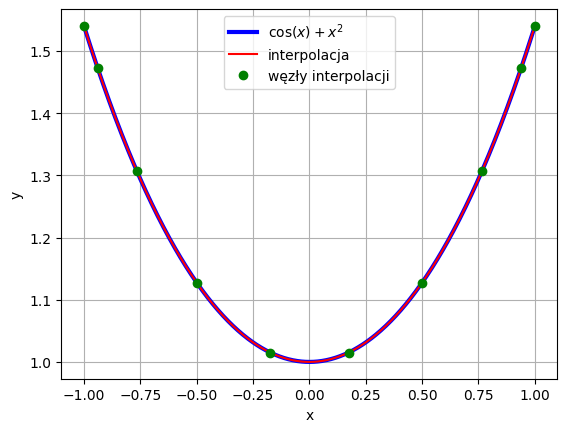

In [3]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)

# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

Czas dla inetrpolacji metodą z biblioteki sp dla n = 10, wynosi t = 0.00251 s
Jakość normy dla interpolacji metodą z biblioteki sp: 0.11011227778498282
Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = 10, wynosi t = 0.00158 s
Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: 0.1101122777849828


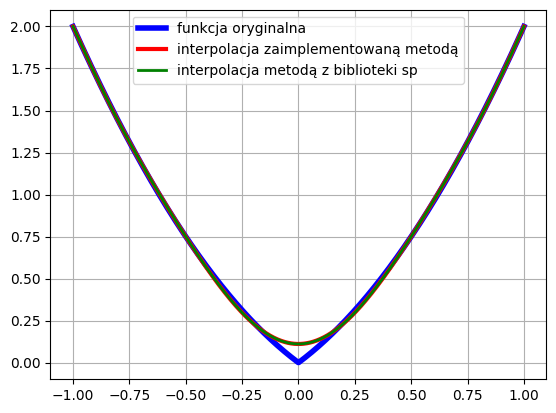

Czas dla inetrpolacji metodą z biblioteki sp dla n = 100, wynosi t = 0.00154 s
Jakość normy dla interpolacji metodą z biblioteki sp: 0.00912405385660911
Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = 100, wynosi t = 0.00106 s
Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: 0.00912405385660904


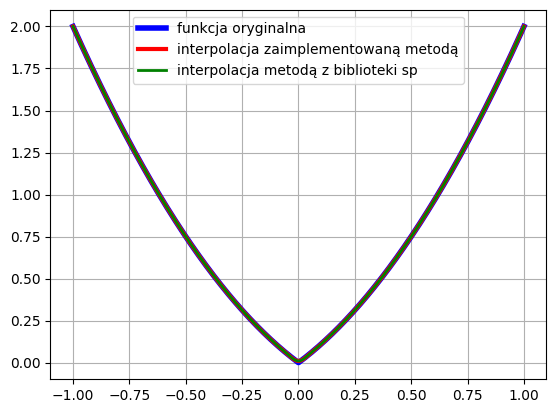

Czas dla inetrpolacji metodą z biblioteki sp dla n = 1000, wynosi t = 0.01791 s
Jakość normy dla interpolacji metodą z biblioteki sp: 0.00023808283885470263
Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = 1000, wynosi t = 0.01131 s
Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: 0.00023808283885475923


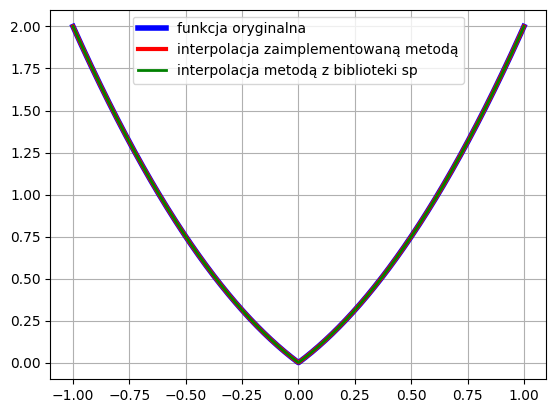

Czas dla inetrpolacji metodą z biblioteki sp dla n = 10000, wynosi t = 0.33668 s
Jakość normy dla interpolacji metodą z biblioteki sp: 1.8533453680896067e-06
Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = 10000, wynosi t = 0.09652 s
Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: 1.8533453686750759e-06


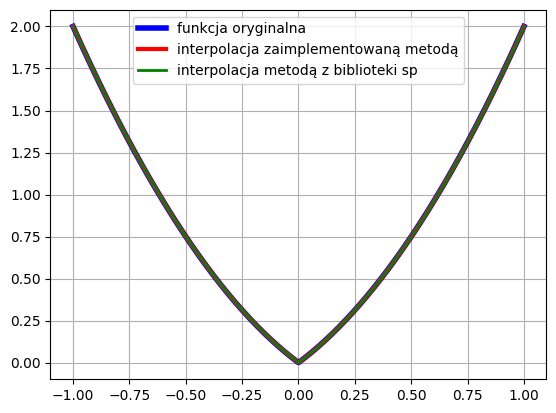

Czas dla inetrpolacji metodą z biblioteki sp dla n = 100000, wynosi t = 27.80548 s
Jakość normy dla interpolacji metodą z biblioteki sp: 2.2337217336215742e-09
Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = 100000, wynosi t = 1.07103 s
Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: 2.233718320336295e-09


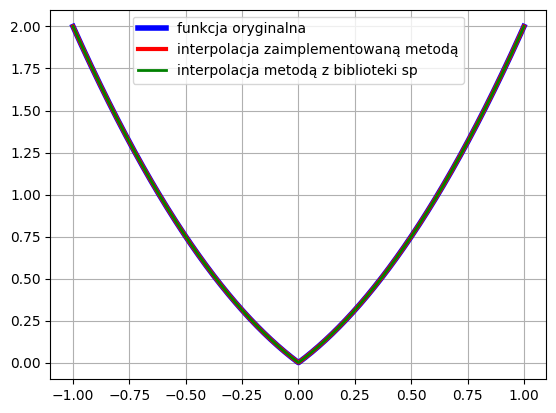

In [22]:
# ===== Twoja implementacja tutaj =====
import time
x = np.linspace(-1, 1, 1000)
n = [1,2,3,4,5]
for i in n:
    nodes = int(10**i)
    xch = main.chebyshev_nodes(nodes)
    weights = main.bar_cheb_weights(nodes)
    
    start_time = time.time()
    ysp = sp.interpolate.barycentric_interpolate(xch, f1(xch), x)
    end_time = time.time()
    duration_sp = end_time - start_time
    print(f'Czas dla inetrpolacji metodą z biblioteki sp dla n = {nodes}, wynosi t = {duration_sp:.5f} s')
    print(f'Jakość normy dla interpolacji metodą z biblioteki sp: {main.L_inf(f1(x),ysp)}')
    
    start_time = time.time()
    yinterp = main.barycentric_inte(xch, f1(xch),  weights, x)
    end_time = time.time()
    duration_own = end_time - start_time
    print(f'Czas dla inetrpolacji metodą zaimplementowaną samodzielnie dla n = {nodes}, wynosi t = {duration_own:.5f} s')
    print(f'Jakość normy dla interpolacji metodą zaimplementowaną samodzielnie: {main.L_inf(f1(x),yinterp)}')
    
    plt.plot(x, f1(x), 'b', linewidth=4, label="funkcja oryginalna")
    plt.plot(x, yinterp, 'r', linewidth=3, label='interpolacja zaimplementowaną metodą')
    plt.plot(x, ysp, 'g', linewidth=2, label='interpolacja metodą z biblioteki sp')
    plt.grid()
    plt.legend()
    plt.show()
    
    

Im większy rząd interpolacji tym błąd stawał się co raz mniejszy. Dla $n=100000$ wartość błędu była rzędu $10^{-9}$, co potwierdza przypuszczenia.
Co więcej warto zwrócić uwagę iż czas wykonywania interpolacji dla $n=100000$ dla funkcji z biblioteki sp był 26 razy dłuższy niż dla funkcji zaimplementowanej samodzielnie. Pokazuje to, że obliczenia macierzowe są znacznie szybsze dla większych wartości.

---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

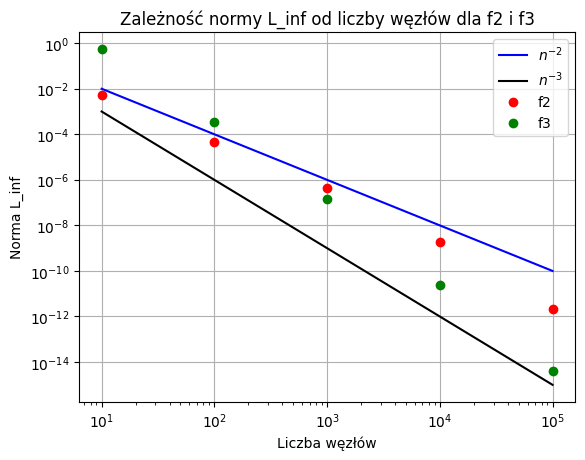

In [9]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-1, 1, 1000)
n_val = [1,2,3,4,5]
norms_f2 = []
norms_f3 = []
nodes = []
n_vf2 = []
n_vf3 = []
for i in n_val:
    node = int(10**i)
    
    n_vf2.append(node**(-2))
    n_vf3.append(node**(-3))
    
    nodes.append(node)
    
    xch = main.chebyshev_nodes(node)
    weights = main.bar_cheb_weights(node)
    
    yint_f2 = main.barycentric_inte(xch, f2(xch), weights, x)
    yint_f3 = main.barycentric_inte(xch, f3(xch), weights, x)
    
    norm_f2 = main.L_inf(f2(x), yint_f2)
    norm_f3 = main.L_inf(f3(x), yint_f3)
    
    norms_f2.append(norm_f2)
    norms_f3.append(norm_f3)

plt.plot(nodes, n_vf2, 'b-', label=r'$n^{-2}$')
plt.plot(nodes, n_vf3, 'k-', label=r'$n^{-3}$')    
plt.plot(nodes, norms_f2, 'ro', label='f2')
plt.plot(nodes, norms_f3, 'go', label='f3')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Liczba węzłów')
plt.ylabel('Norma L_inf')
plt.title('Zależność normy L_inf od liczby węzłów dla f2 i f3')
plt.legend()
plt.grid()
plt.show()
    
    

Na wykresie można zauważyć, że wartość normy maleje wraz ze wzrostem ilości węzłów, co więcej proste $n^{-v}$ są zgodne z otrzymanymi wynikami.

---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

Minimalny błąd dla n parzystych: 0.93092
Minimalny błąd dla n nieparzystych: 1.95701


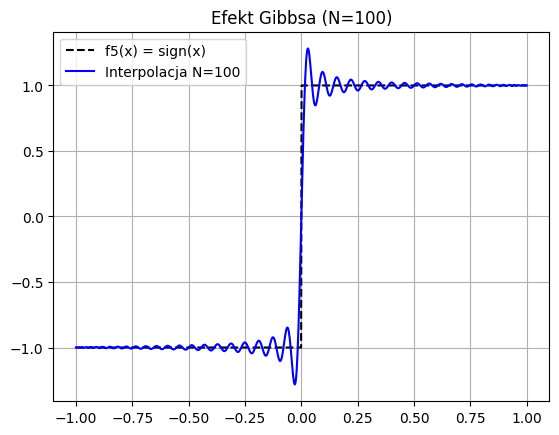

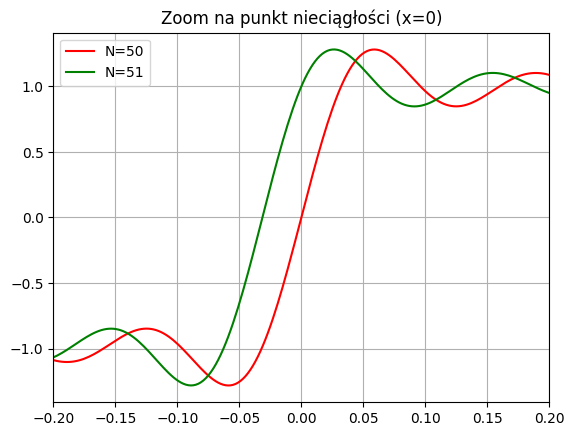

In [19]:
# ===== Twoja implementacja tutaj =====
x = np.linspace(-1, 1, 1000)
errors_odd = []
errors_even = []

for i in range(20,100):
    nodes = int(i)
    xch = main.chebyshev_nodes(nodes)
    weights = main.bar_cheb_weights(nodes)
    yint = main.barycentric_inte(xch, f5(xch), weights, x)
    error = main.L_inf(f5(x), yint)
    if nodes % 2 == 0:
        errors_even.append(error)
    else:
        errors_odd.append(error)

srednia_parzyste = np.mean(errors_even[-5:])
srednia_nieparzyste = np.mean(errors_odd[-5:])

print(f"Minimalny błąd dla n parzystych: {srednia_parzyste:.5f}")
print(f"Minimalny błąd dla n nieparzystych: {srednia_nieparzyste:.5f}")


n_plot = 100
nodes = main.chebyshev_nodes(n_plot)
weights = main.bar_cheb_weights(n_plot)
y_interp = main.barycentric_inte(nodes, f5(nodes), weights, x)

plt.plot(x, f5(x), 'k--', label='f5(x) = sign(x)')
plt.plot(x, y_interp, 'b-', label=f'Interpolacja N={n_plot}')
plt.title(f"Efekt Gibbsa (N={n_plot})")
plt.legend()
plt.grid()
plt.figure()

for n_zoom, color in [(50, 'r'), (51, 'g')]:
    nodes_z = main.chebyshev_nodes(n_zoom)
    weights_z = main.bar_cheb_weights(n_zoom)
    y_interp_z = main.barycentric_inte(nodes_z, f5(nodes_z), weights_z, x)
    plt.plot(x, y_interp_z, color=color, label=f'N={n_zoom}')

plt.xlim(-0.2, 0.2)
plt.title("Zoom na punkt nieciągłości (x=0)")
plt.legend()
plt.grid(True)

plt.show()

Przeprowadzona analiza wykazała, że błąd interpolacji dla funkcji nieciągłej nie maleje do zera, lecz stabilizuje się na stałym poziomie, zwanym efektem Gibbsa. Zaobserwowano istotną różnicę w wartościach tego błędu, który dla rzędów nieparzystych wynosi około 1.96, natomiast dla parzystych jest znacznie niższy i oscyluje wokół 0.93. Ta dysproporcja wynika bezpośrednio z rozmieszczenia węzłów Czebyszewa: przy nieparzystym rzędzie jeden z węzłów znajduje się dokładnie w punkcie nieciągłości ($x=0$), co „kotwiczy” wielomian w zerze i wymusza gwałtowne oscylacje przy próbie odwzorowania skoku funkcji. W przypadku rzędów parzystych brak węzła w punkcie zero daje wielomianowi większą swobodę, co pozwala na łagodniejsze przejście między wartościami i skutkuje mniejszą amplitudą błędu maksymalnego.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)